## Answer 1:
### Task: To implement a k-nearest neighbors regression model
Dataset used : Automobile Data Set from UCI repository

In [1]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading and Preprocessing:

In [3]:
#Loading the dataset into a dataframe
na=['?']
column_names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
               'length', 'width', 'height', 'curb-weight', 'engine-type', ' num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
               'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df=pd.read_csv('imports-85.data',header=None,na_values=na, names=column_names)


In [4]:
#dataset information
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15   num-of-cylinders  205 non-null    object 
 16  engine-size        205 non

In [5]:
#checking for NULL value
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
 num-of-cylinders     0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#Replacing the NULL values with median of the data
df.fillna(df.median(), inplace= True)
print(f"Total Na values Left {df.isna().sum().sum()}")

Total Na values Left 2


In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
 num-of-cylinders    0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Only considering numerical features price prediction

In [8]:
numeric_features = ['normalized-losses', 'wheel-base', 'length', 'width', 
                      'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                      'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df=df[numeric_features].copy()
df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,115.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
#checking for NULL values in the dataframe
df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
#checking the datatype of each feature
df.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [11]:
#Normalizing the feature values 
df_normalised = (df - df.mean())/(df.std())
#Price is to be predicted so replacing it with original values
df_normalised['price']=df['price']
df_normalised.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-0.176072,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.519218,-1.836849,-0.287645,0.172886,-0.264336,-0.644974,-0.544725,13495.0
1,-0.176072,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.519218,-1.836849,-0.287645,0.172886,-0.264336,-0.644974,-0.544725,16500.0
2,-0.176072,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,-2.397444,0.682014,-0.287645,1.260675,-0.264336,-0.950684,-0.689938,16500.0
3,1.364561,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.514536,0.458823,-0.035885,-0.054790,0.783804,-0.186409,-0.109087,13950.0
4,1.364561,0.106848,0.206750,0.229440,0.235366,0.515545,-0.514536,0.458823,-0.539405,0.274076,0.783804,-1.103540,-1.270789,17450.0


In [12]:
X = df_normalised.drop(['price'],axis=1).values
y=df_normalised['price'].values

### Splitting the dataset into train and test set

In [13]:
shuffled_idx = np.random.RandomState(seed=2021).permutation(np.arange(X.shape[0]))
shuffled_idx

array([ 98,  24,  23, 193, 104,  64,   0,  52, 183, 141, 135,   8,  74,
       112, 174, 127,  59,  35,  18, 126, 159, 186,  72,  56, 196, 171,
        51,  92,  77,  42,  86,  13,  10, 117, 149, 198, 125, 136, 158,
        28,   4, 111,  22, 108, 137,  58, 130,   2, 173, 139,  14, 148,
        79, 188,  36, 118, 146, 153,  55,  31,  43,  99, 172, 162, 177,
       133, 201,  66,  34,  76,  45,   6,  80,  30,  73,  65,  68, 169,
        75,  12, 129, 145,  81, 168,  69, 163, 122, 199,  88, 179,  97,
        15, 170, 204, 105,  83,  41, 155, 181,  46, 202,   3,  16,  67,
        39, 132,  29, 134,  96, 184,  61, 185,  48,  95,  37, 192, 189,
       182, 150,  60,  91,  47,  26, 175, 197, 161, 156,  90, 113,  38,
       167, 191, 115,  20, 121, 107, 131,  87,  32, 164, 151,  50, 160,
        84, 165, 103, 100,   9, 119,  27, 187,  89,  17,  78, 147,  11,
        53,  40, 143,  82,  19, 106, 200, 138, 114,  25, 195, 190, 203,
        71, 142, 166, 180,   5, 120, 194, 123,  54, 178, 144,  4

In [14]:
test_ratio = 0.2
split_idx = int(X.shape[0]*(1-test_ratio))
train_idx, test_idx = shuffled_idx[:split_idx], shuffled_idx[split_idx:]

In [15]:
x_train, x_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]

### Further splitting the train set for cross validation

In [16]:
shuffled_idx = np.random.RandomState(seed=2024).permutation(np.arange(x_train.shape[0]))
shuffled_idx

array([138,  75,  21, 118, 146,  49, 123,  70, 151, 159,  34, 154,  15,
       113,  40,  80,  30,  83,  93,  84,  17,  56, 129, 158, 131,  25,
        37,  26,  76, 115, 134,  44,   4,   5,  14,  79,  35,  98, 144,
        88, 101, 161,  19,  82,  52,  46,  23,  10,  24,  16,  81,  89,
        71, 140, 124,  87,   6, 147,  78,  72,  32, 106,  38, 143, 148,
         9,  68, 116,  51,  99, 135,  47,  85, 141,  67,   3,  58, 105,
       100,  20,   2, 117, 108,  62, 130, 109,  50, 122,  92,  12,  64,
       125, 163,  33,   1, 120,  65,  45, 156, 107, 150,  29, 112, 157,
       103,  63, 152, 121,  59, 149, 142,  22,  77,  43,   0,  55, 162,
        13,  94,  53, 104,  48,   7, 155,  90, 139,  18,   8, 126, 133,
       137,  57, 132, 145,  61,  69, 119,  86, 160,  97,  31,  42, 102,
        73, 114,  54,  39,  91,  28,  11, 153,  95, 110, 111,  66,  74,
        60, 127,  41,  36,  27, 128,  96, 136])

In [17]:
val_ratio = 0.2
split_idx = int(x_train.shape[0]*(1-val_ratio))
train_idxs, val_idx = shuffled_idx[:split_idx], shuffled_idx[split_idx:]

In [18]:
x_trains, x_val, y_trains, y_val = x_train[train_idxs], x_train[val_idx], y_train[train_idxs], y_train[val_idx]

In [19]:
x_trains.shape

(131, 13)

In [20]:
x_val.shape

(33, 13)

In [21]:
x_test.shape

(41, 13)

## Implementation of the KNN Regression Model :
Euclidean distance and Manhattan distances are used for calculating the distance between two points.

Euclidean distance can be calculated using :

$$ d(p,q) = (\sum \limits_{i=1}^{n} ( p_{i} - q_{i} )^{2})^{1/2} $$

                               where, p,q = points in Eucludian n-space


Manhattan distance can be calculated using :

$$ d(p,q) = (\sum \limits_{i=1}^{n} | p_{i} - q_{i} | $$

                             where, p,q = points in Eucludian n-space

In [22]:
def optimal_k(k,x_set,y_set,p=2) :
    y_pred=[]
    for x in x_set :
        dist = np.power(np.power(np.abs(x_trains - x), p).sum(axis=1), 1/p)
        sorted_idxs = np.argsort(dist)
        idxs = sorted_idxs[:k]
        ys=[]
        for idx in idxs:
            ys.append(float(y_trains[idx]))
        y_pred.append(sum(ys)/k)
    return(np.sqrt(((y_pred- y_set) ** 2).mean()))

### Finding the optimal value of k using cross validation :

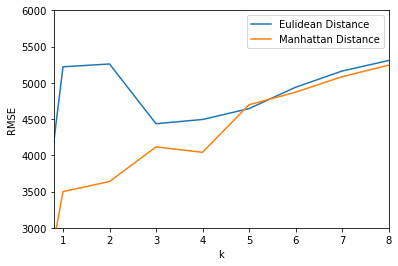

In [23]:
error_manhattan=[]
error_euclidean=[]
for i in range(1,10) :
    error_euclidean.append(optimal_k(i,x_val,y_val,2))
    error_manhattan.append(optimal_k(i,x_val,y_val,1))
error_euclidean.insert(0,0)
error_manhattan.insert(0,0)
plt.xlim([0.8,8])
plt.ylim([3000,6000])
plt.plot(error_euclidean)
plt.plot(error_manhattan)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.legend(['Eulidean Distance', 'Manhattan Distance'])
plt.show()


From the above plot it is visible that for Manhattan distance the optimal value of k is 4

For Euclidean distance the optimal value of k is 3

In [24]:
print("RMSE for Euclidean distance at k = 3 : {0:.0f}".format(optimal_k(3,x_val,y_val,2)))

RMSE for Euclidean distance at k = 3 : 4436


In [25]:
print("RMSE for Manhattan distance at k = 4 : {0:.0f}".format(optimal_k(4,x_val,y_val,1)))

RMSE for Manhattan distance at k = 4 : 4041


### RMSE in test set using the optimal value of k

In [26]:
print("RMSE for Manhattan distance at k = 4 : {0:.0f}".format(optimal_k(4,x_test,y_test,1)))

RMSE for Manhattan distance at k = 4 : 3625


In [27]:
print("RMSE for Euclidean distance at k = 3 : {0:.0f}".format(optimal_k(3,x_test,y_test,2)))

RMSE for Euclidean distance at k = 3 : 3345


### Final Result
The RMSE in test set is 3023 at k = 3 for Manhattan Distance
The RMSE in test set is 3680 at k = 4 for Euclidean Distance

### LO Regularization:
As per my understanding, L0 regularization attempts to find the best possible subset of features for 
which the RMSE is minimum.
All the features which are used in the above problem to predict the price might not have the same influence 
on price. Removing the unnecessary features may give better results.

Therefore, introducing L0 regularization in the above model can improve the results.

## Answer 2:
### Task: To classify the salary into two classes i.e '<=50K' and '>50K' using a decision tree
Dataset used : Census income dataset from UCI repository

In [28]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing
The dataset is imported to Dataframe and data preprocessing is perfomed.

In [29]:
na=[' ?']
column_names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
df=pd.read_csv('adult.data',header=None,na_values=na, names=column_names,index_col=False)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
#checking the number of NULL values in the data
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

---
workclass, occupation and native-country are categorical features, the NULL values are replaced by mode.
In the salary column '<=50K'is replaced with -1 and '>50K' is replaced with +1
So, essentially there will be two classes -1 and +1.
Few categorical features are also replaced


In [31]:
df.fillna(df.mode().loc[0], inplace= True)
print(f"Total Na values Left: {df.isna().sum().sum()}")

Total Na values Left: 0


In [32]:
df['salary'].replace(' <=50K',-1,inplace=True)
df['salary'].replace(' >50K',+1,inplace=True)
df['sex'].replace(' Male',0,inplace=True)
df['sex'].replace(' Female',1,inplace=True)
df['race'].replace(' White',0,inplace=True)
df['race'].replace(' Black',1,inplace=True)
df['race'].replace(' Asian-Pac-Islander',2,inplace=True)
df['race'].replace(' Amer-Indian-Eskimo',3,inplace=True)
df['race'].replace(' Other',4,inplace=True)
df['relationship'].replace(' Not-in-family',0,inplace=True)
df['relationship'].replace(' Husband',1,inplace=True)
df['relationship'].replace(' Wife',2,inplace=True)
df['relationship'].replace(' Own-child',3,inplace=True)
df['relationship'].replace(' Unmarried',4,inplace=True)
df['relationship'].replace(' Other-relative',5,inplace=True)

In [33]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,0,0,0,2174,0,40,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,1,0,0,0,0,13,United-States,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,0,0,0,0,0,40,United-States,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,1,1,0,0,0,40,United-States,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,2,1,1,0,0,40,Cuba,-1


['age','fnlwgt','education-num','relationship','race','sex','capital-gain','capital-loss','hours-per-week','salary']

The above features are used for classification in the given dataset.

In [34]:
column_names=['age','fnlwgt','education-num','relationship','race','sex','capital-gain','capital-loss','hours-per-week','salary']


In [35]:
dF = df[column_names]
dF.shape

(32561, 10)

### Implementation of Decision tree
Dictionary datastructure is used to store the desicion tree. Information gain is used to determine the best possible 
splits in the data.

In a data with N classes, the entropy is calculated as follows :
$$ E = − \sum \limits _{i=1} ^{N} p_{i}log_{2}p_{i} $$
where, $ p_{i} $  is the probability of randomly selecting an example in class i

In [36]:
#checks whether all the data falls into the same class or not
def purity(data) :
    pure=len(np.unique(data[:,-1]))
    if pure == 1 :
        return 1
    return 0

#Predicts the label of the data using majority count
def label(data) :
    summation= np.sum(data[:,-1])
    if summation >= 0 :
        return 1
    else :
        return -1

#returns the entropy of the data
def cal_Entropy(data):
    label, labelcounts = np.unique(data[:, -1], return_counts = True)
    probability = labelcounts / labelcounts.sum()
    return sum(probability * -np.log2(probability))

#returns the total entropy considering the split
def total_entropy(data_below, data_above) :
    lengthbelow=len(data_below)
    lengthabove=len(data_above)
    total= lengthbelow+lengthabove
    probability_below=lengthbelow/total
    probability_above=lengthabove/total
    return  probability_below* cal_Entropy(data_below) + probability_above * cal_Entropy(data_above)


#Divides the data according to the splitvalue of the feature
def datasplit(data,splitcol,splitval) :
    splitcolval = data[:, splitcol]
    return data[splitcolval <= splitval], data[splitcolval > splitval]


In [37]:
#Finds the possible splits and their split values
def get_possible_splits(data) :
    possible_splits = {}
    columns = data.shape[1]
    #i is the column index, it iterates for every column other than the last one 
    for i in range(0,columns-1) :
        vals = data[:, i]
        unique_vals = np.unique(vals)
        if len(unique_vals) == 1:
            possible_splits[i] = unique_vals
        else:
            possible_splits[i] = [] #list because there are multiple values for which split is possible
            
            # j iterates over every unique value in the ith column
            for j in range(len(unique_vals)):
                if j != 0 :
                    current_val = unique_vals[j]
                    previous_val = unique_vals[j - 1]
                    possible_splits[i].append((current_val + previous_val) / 2)
    return possible_splits

In [38]:
# Finds the best split by comparing the change in entropy
def find_best_split(data, possible_splits) :
    overall_entropy = 9999
    bestsplit_col = 0
    bestsplit_val = 0
    for split_col in possible_splits :
        for split_val in possible_splits[split_col] :
            data_below, data_above = datasplit(data, split_col, split_val)
            current_overall_entropy = total_entropy(data_below, data_above)
            if current_overall_entropy <= overall_entropy :
                bestsplit_val=split_val
                bestsplit_col=split_col
                overall_entropy = current_overall_entropy
                
    return bestsplit_val, bestsplit_col

In [39]:
#creates the decision tree and stores it in a dictionary
#cd is the current depth

def create_decisiontree(df,cd=0,maxdepth=5) :
    if cd == 0 :
        data=df.values
    else :
        data = df
    if purity(data) or cd==maxdepth :
        return label(data)
    else :
        cd=cd+1
        possible_splits = get_possible_splits(data)
        split_val, split_col = find_best_split(data, possible_splits)
        data_below, data_above = datasplit(data, split_col, split_val)
        if len(data_below) == 0 or len(data_above) == 0 :
            return label(data)
        else :
            question = str(column_names[split_col]) + " <= " + str(split_val)
            decision_sub_tree = {question: []}
            no = create_decisiontree(data_above, cd, maxdepth)
            yes = create_decisiontree(data_below, cd, maxdepth)
            if yes == no:
                decision_sub_tree = yes
            else :
                decision_sub_tree[question].append(yes)
                decision_sub_tree[question].append(no)
            return decision_sub_tree

In [40]:
#Used for classifying the data on a trained decision tree
def classification(sample_data, decision_tree):
    if not isinstance(decision_tree, dict):
        return decision_tree
    question = list(decision_tree.keys())[0]
    feature, value = question.split(" <= ")
    if sample_data[feature] <= float(value):
        ans = decision_tree[question][0]
    else:
        ans = decision_tree[question][1]
    return classification(sample_data, ans)


### Splitting the dataset into train and test set
80% of the data is used for training and the remaining 20% is used for validation

In [41]:
shuffled_index = np.random.RandomState(seed=2021).permutation(np.arange(dF.shape[0]))
shuffled_index

array([20901, 14170,  1776, ...,  6201, 27989, 25716])

In [42]:
train_ratio = 0.8
split_index = int(dF.shape[0]*(train_ratio))
train_index, test_index = shuffled_index[:split_index], shuffled_index[split_index:]

In [43]:
dFTest = dF.loc[test_index]
dFTrain = dF.loc[train_index]

In [44]:
dFTrain.shape

(26048, 10)

In [45]:
dFTest.shape

(6513, 10)

### Further splitting the trainset for cross validation

In [46]:
shuffled_index = np.random.RandomState(seed=2021).permutation(np.arange(dFTrain.shape[0]))
shuffled_index

array([10160, 18385, 20320, ..., 17536,  6201, 25716])

In [47]:
val_ratio = 0.8
split_index = int(dFTrain.shape[0]*(train_ratio))
trains_index, val_index = shuffled_index[:split_index], shuffled_index[split_index:]

In [48]:
dFVal = dF.loc[val_index]
dFTrains = dF.loc[trains_index]

In [49]:
dFVal.shape

(5210, 10)

In [50]:
dFTrains.shape

(20838, 10)

### Finding the optimal value of maxdepth(Hyperparameter) using validation


In [51]:
accuracy_val=[]
accuracy_train=[]
for i in range(1,8) :
    decision_tree = create_decisiontree(dFTrains, maxdepth = i)
    predictions_val = dFVal.apply(classification, axis = 1, args = (decision_tree,))
    results_val = predictions_val== dFVal.iloc[:, -1]
    predictions_train = dFTrains.apply(classification, axis = 1, args = (decision_tree,))
    results_train = predictions_train== dFTrains.iloc[:, -1]
    accuracy_vals=results_val.mean()*100
    accuracy_trains=results_train.mean()*100
    print(" Validation accuracy at {} depth {}".format(i,accuracy_vals))
    print(" Training accuracy at {} depth {}".format(i,accuracy_trains))
    accuracy_val.append(accuracy_vals)
    accuracy_train.append(accuracy_trains)


 Validation accuracy at 1 depth 75.83493282149712
 Training accuracy at 1 depth 76.09175544677991
 Validation accuracy at 2 depth 76.10364683301344
 Training accuracy at 2 depth 76.28851137345235
 Validation accuracy at 3 depth 82.47600767754318
 Training accuracy at 3 depth 83.07899030617142
 Validation accuracy at 4 depth 83.8003838771593
 Training accuracy at 4 depth 84.64343986946923
 Validation accuracy at 5 depth 83.8003838771593
 Training accuracy at 5 depth 84.64823879451004
 Validation accuracy at 6 depth 83.95393474088291
 Training accuracy at 6 depth 84.94577214703907
 Validation accuracy at 7 depth 84.12667946257197
 Training accuracy at 7 depth 85.10413667338517


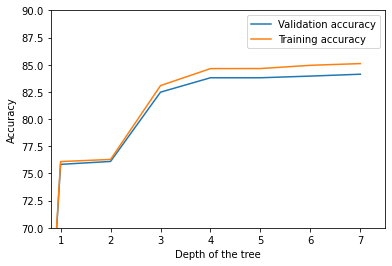

In [52]:
accuracy_val.insert(0,0) #for graph formatting
accuracy_train.insert(0,0) #for graph formatting
plt.plot(accuracy_val)
plt.plot(accuracy_train)
plt.xlim([0.8,7.5])
plt.ylim([70,90])
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.legend(['Validation accuracy','Training accuracy'])
plt.show()

From the above results, Maximum depth of the tree is chosen as 4.


### Testing the model :

In [53]:
decision_tree = create_decisiontree(dFTrains, maxdepth = 4)
predictions = dFTest.apply(classification, axis = 1, args = (decision_tree,))
results = predictions== dFTest.iloc[:, -1]
accuracy=results.mean()*100
print("Accuracy= {0:.2f}%".format(accuracy))

Accuracy= 83.66%
